In [7]:
!pip install dash==0.39.0



In [8]:

!pip install dash-daq==0.1.0

In [0]:
import dash
import dash_core_components as dcc
import dash_html_components as html

In [0]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

In [0]:
import pandas as pd


In [12]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
  name=fn, length=len(uploaded[fn])))

Saving red_crown_sample_data1.csv to red_crown_sample_data1 (1).csv
User uploaded file "red_crown_sample_data1.csv" with length 21996498 bytes


In [0]:
df_data = pd.read_csv('red_crown_sample_data1.csv')

In [14]:
df_data.describe()

,Unnamed: 0,age,contract_length,category,score1,score2,score3
count,239788.000000,239788.000000,68263.000000,239788.000000,239788.000000,239788.000000,239788.000000
mean,119894.500000,34.204689,2081.781185,1.621895,4.918111,1.118694,-1.516862
std,69220.977512,2.984439,1225.355978,0.484915,0.517630,0.599922,1.025697
min,1.000000,9.000000,1.000000,1.000000,2.149353,0.361095,-10.936312
25%,59947.750000,32.000000,1059.000000,1.000000,4.678020,0.711478,-2.027088
50%,119894.500000,34.000000,2036.000000,2.000000,5.033811,0.908702,-1.397082
75%,179841.250000,36.000000,3010.000000,2.000000,5.285969,1.347086,-0.787911
max,239788.000000,45.000000,6234.000000,2.000000,6.560284,5.713280,0.000000


In [15]:
df_data.shape

(239788, 13)

In [16]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239788 entries, 0 to 239787
Data columns (total 13 columns):
Unnamed: 0         239788 non-null int64
ID                 239788 non-null object
age                239788 non-null int64
submission_date    239664 non-null object
contract_length    68263 non-null float64
upgraded           239788 non-null bool
gender             239788 non-null object
category           239788 non-null int64
score1             239788 non-null float64
score2             239788 non-null float64
score3             239788 non-null float64
first_contact      86501 non-null object
customer           239788 non-null bool
dtypes: bool(2), float64(4), int64(3), object(4)
memory usage: 20.6+ MB


In [17]:

# Checking for missing values
df_data.isnull().sum()

Unnamed: 0              0
ID                      0
age                     0
submission_date       124
contract_length    171525
upgraded                0
gender                  0
category                0
score1                  0
score2                  0
score3                  0
first_contact      153287
customer                0
dtype: int64

In [0]:
corr = df_data.corr()

In [35]:
print (corr['customer'].sort_values(ascending=False))

customer           1.000000
upgraded           0.266606
age                0.126768
score2             0.057003
category           0.012293
gender             0.007692
score3            -0.019022
Unnamed: 0        -0.056368
contract_length   -0.088066
score1            -0.104302
Name: customer, dtype: float64


In [19]:
print(df_data.groupby('customer').size())

customer
False    211723
True      28065
dtype: int64


In [0]:
# remove NaN
df_data['contract_length'].fillna(0, inplace=True)

In [22]:

df_data = df_data.drop(columns=['submission_date','first_contact'])
df_data.head()



,Unnamed: 0,ID,age,contract_length,upgraded,gender,category,score1,score2,score3,customer
0,1,qzx1,41,2027.0,False,Female,1,4.155778,1.303375,-0.003228,False
1,2,qzx1,42,162.0,False,Female,2,3.552356,1.719870,-0.000300,False
2,3,qzx1,40,381.0,False,Female,2,3.551545,2.055290,-0.000003,False
3,4,qzx1,40,351.0,False,Female,2,4.202698,1.151331,-0.010516,False
4,5,qzx1,44,120.0,False,Female,2,2.818966,2.169682,-0.000348,False


In [23]:
# fix missing values of contract_length
# replace missing values with the average contract_length:
df_data['contract_length'].fillna(df_data['contract_length'].mean(), inplace=True)
df_data.contract_length.isna().sum()

0

In [24]:
# convert bool attributes upgraded
df_data['upgraded'] = df_data.upgraded.apply(lambda x: str(x))
df_data['upgraded'] = df_data.upgraded.apply(lambda x: x.replace('False','0'))
df_data['upgraded'] = df_data.upgraded.apply(lambda x: x.replace('True','1'))
df_data.upgraded.unique()

array(['0', '1'], dtype=object)

In [0]:


# convert upgraded data fron object to number
df_data['upgraded'] = df_data.upgraded.apply(lambda x: int(x))



In [26]:
# convert categorical attributes gender
df_data['gender'] = df_data.gender.apply(lambda x: x.replace("Male","0"))
df_data['gender'] = df_data.gender.apply(lambda x: x.replace("Female","1"))
df_data.gender.unique()

array(['1', '0'], dtype=object)

In [0]:
# convert gender data fron object to number
df_data['gender'] = df_data.gender.apply(lambda x: int(x))

In [28]:
# convert bool attributes customer
df_data['customer'] = df_data.customer.apply(lambda x: str(x))
df_data['customer'] = df_data.customer.apply(lambda x: x.replace('False','0'))
df_data['customer'] = df_data.customer.apply(lambda x: x.replace('True','1'))
df_data.customer.unique()

array(['0', '1'], dtype=object)

In [0]:
# convert customer data fron object to number
df_data['customer'] = df_data.customer.apply(lambda x: int(x))

In [0]:
# select only numeric attributes
numeric_features = df_data[['age','contract_length','upgraded','gender','category','score1','score2','score3','customer']]

In [36]:
# attribute correlation
corr = numeric_features.corr()
print (corr['customer'].sort_values(ascending=False))

customer           1.000000
upgraded           0.266606
age                0.126768
score2             0.057003
category           0.012293
gender             0.007692
score3            -0.019022
contract_length   -0.088066
score1            -0.104302
Name: customer, dtype: float64


Since age, category and gender show high correlation scores, I will be taking them into account for clustering. 


In [0]:


# create the train dataset of customers
df_customers = df_data[df_data['customer']==1]

df_non_customers = df_data[df_data['customer']==0]

In [0]:
df_non_customers = df_non_customers.drop(['ID'],axis=1)
df_customers = df_customers.drop(['ID'],axis=1)

In [0]:
import numpy as np
## Convert dataframe into list and then into a numpy array
train = df_customers.values.tolist() 
train = np.array(train)

In [0]:
## Convert dataframe into list and then into a numpy array
test = df_non_customers.values.tolist() 
test = np.array(test)

In [0]:
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns
sns.set();




In [0]:
## Convert dataframe into list and then into a numpy array
train = df_data[['score1','gender']].values.tolist()
train = np.array(train)

In [0]:
test = df_data[['score1','gender']].values.tolist() 
test = np.array(test)

In [0]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(train)
pred = kmeans.predict(test)

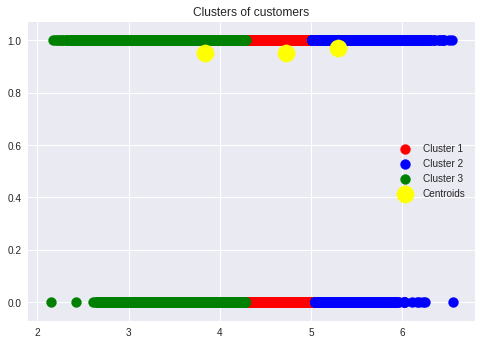

In [91]:
import matplotlib.pyplot as plt
# Visualising the clusters
plt.scatter(test[pred == 0, 0], test[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(test[pred == 1, 0], test[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(test[pred == 2, 0], test[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')

plt.legend()
plt.show()

In [0]:
## Convert dataframe into list and then into a numpy array
train = df_data[['score1','category']].values.tolist()
train = np.array(train)

In [0]:
test = df_data[['score1','category']].values.tolist() 
test = np.array(test)

In [0]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(train)
pred = kmeans.predict(test)

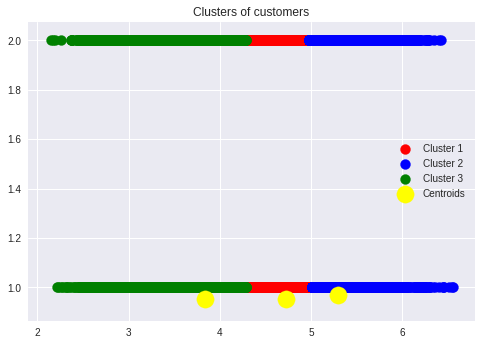

In [96]:
import matplotlib.pyplot as plt
# Visualising the clusters
plt.scatter(test[pred == 0, 0], test[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(test[pred == 1, 0], test[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(test[pred == 2, 0], test[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')

plt.legend()
plt.show()

In [0]:
## Convert dataframe into list and then into a numpy array
train = df_data[['score1','gender']].values.tolist()
train = np.array(train)

In [0]:
test = df_data[['score1','gender']].values.tolist() 
test = np.array(test)

In [0]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(train)
pred = kmeans.predict(test)

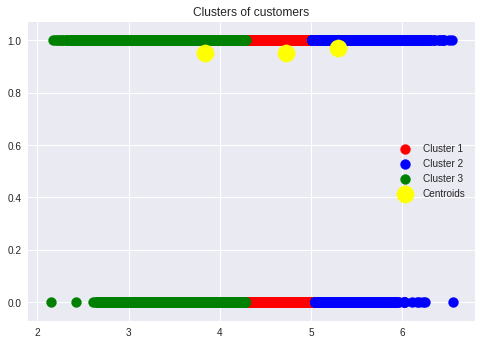

In [116]:
import matplotlib.pyplot as plt
# Visualising the clusters
plt.scatter(test[pred == 0, 0], test[pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(test[pred == 1, 0], test[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(test[pred == 2, 0], test[pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')

plt.legend()
plt.show()